# Analysis of Corporate Lobbying

<p>
This notebook will contain analysis of the master_df scraped and updated <br>
from corporate_lobbying.ipynb and update_master.ipynb.
<br><br>
This will be a slow burn - my data goes back to Aug 5 2025 and the website which I am <br>
scraping from gets updated daily.
<br><br>
I want to gather data slowly and over time see how the amount of corporate lobbying affects <br>
the stock price of the companies conducting the lobbying.
</p>

In [62]:
import pandas as pd
import io
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

In [2]:
#read in master df

df = pd.read_csv(r'C:\Users\ronan\Projects\master_df.csv', parse_dates=['Date'], dayfirst=True)

C:\Users\ronan\AppData\Local\Temp\ipykernel_17284\634942143.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv(r'C:\Users\ronan\Projects\master_df.csv', parse_dates=['Date'], dayfirst=True)


In [9]:
#make column names standard format
df.columns = df.columns.str.lower().str.replace(' ', '_')

#Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

ticker
VRTX    2270000
BDX     1498000
HPQ      800000
EQIX     720000
ARDX     670000
NDAQ     650000
GNW      459296
SRPT     430000
SHW      340000
ENTG     340000
Name: amount, dtype: int64


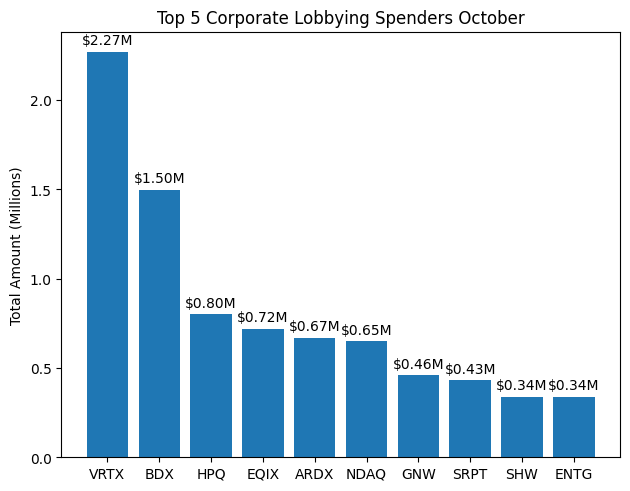

In [11]:
df_month = df[df['date'] >= '2025-10-01' ] #get data for the month

totals_monthly = df_month.groupby('ticker')['amount'].sum().sort_values(ascending=False).head(10) #group by amount per ticker
print(totals_monthly) #see the top 10 amounts

# bar plot for monhtly lobbying amounts
fig, ax = plt.subplots()
bars = ax.bar(totals_monthly.index, totals_monthly.values / 1_000_000)
ax.set_ylabel("Total Amount (Millions)")

ax.bar_label(bars,
             labels=[f"${v/1_000_000:.2f}M" for v in totals_monthly.values],
             padding=3)
plt.tight_layout()
plt.title('Top 5 Corporate Lobbying Spenders October')
plt.show()


ticker
BDX     1498000
VRTX    1130000
HPQ      800000
EQIX     720000
SRPT     430000
SHW      340000
OLN      273000
MOH      260000
ACN      230000
ENTG     230000
Name: amount, dtype: int64


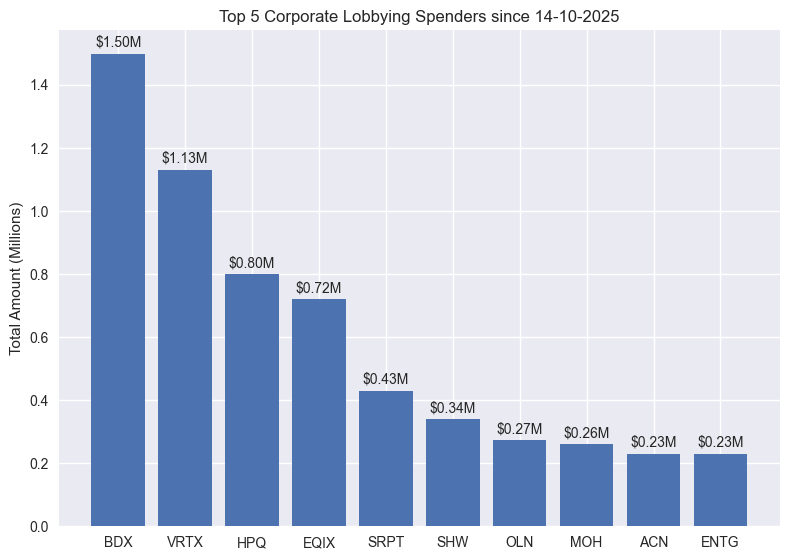

In [83]:
df_daily = df[df['date'] >= '2025-10-14']

totals_daily = df_daily.groupby('ticker')['amount'].sum().sort_values(ascending=False).head(10) #group by amount per ticker
print(totals_daily)

# bar plot
fig, ax = plt.subplots()
bars = ax.bar(totals_daily.index, totals_daily.values / 1_000_000)
ax.set_ylabel(f"Total Amount (Millions)")

ax.bar_label(bars,
             labels=[f"${v/1_000_000:.2f}M" for v in totals_daily.values],
             padding=3)
plt.tight_layout()
plt.title(f'Top 5 Corporate Lobbying Spenders since 14-10-2025')
plt.show()

In [ ]:
df.groupby('ticker')['amount'].sum().sort_values(ascending=False).head(10)

Ticker
V       15960000
INTC     4850000
LMT      4014915
PFE      3770000
SO       2890000
VRTX     2270000
BDX      2055000
ARDX     1950000
TAK      1620000
FLR       945887
Name: Amount, dtype: int64

<p>
Recently the ticker V (Visa) jumped head of INTC as the company who has lobbied the most since I started recording data <br>
I want to look more into this because they spent almost $16m on lobbying
</p>

In [ ]:
df[df['ticker'] == 'V']

,Ticker,Company Name,Amount,Date
88,V,Visa Inc.,1420000,2025-09-26
89,V,Visa Inc.,2030000,2025-09-26
90,V,Visa Inc.,1810000,2025-09-26
91,V,Visa Inc.,1800000,2025-09-26
92,V,Visa Inc.,2110000,2025-09-26
93,V,Visa Inc.,2310000,2025-09-26
94,V,Visa Inc.,2440000,2025-09-26
95,V,Visa Inc.,2040000,2025-09-26


<p>
Holy shit - they spent $16m dollars in one day on lobbying - lets see how their stock has since reacted to see if there has been a<br>
significant reaction
</p>

<p>
So I have my dataset - it's slowly coming together. <br>
I want to see how stocks performed after lobbying was reported. <br>
</p>

In [ ]:
#sum together amounts that occurred on the same day for the same ticker to count as one 'transaction'

#first move weekend lobbying events to the friday of the week they occur on
df['date'] = pd.to_datetime(df['date'])

df['adjusted_date'] = df['date'] - pd.to_timedelta(df['date'].dt.weekday - 4, unit='D')
df.loc[df['date'].dt.weekday < 5, 'adjusted_date'] = df['date']  # keep weekdays unchanged

df_collapsed = (df.groupby(['ticker', 'adjusted_date'], as_index=False)
                .agg({
                    'amount':'sum',
                    'company_name':'first'
                })).sort_values('adjusted_date', ascending=True).reset_index(drop=True)
df_collapsed

,ticker,adjusted_date,amount,company_name
0,ATEX,2025-08-05,10000,Anterix
1,SATS,2025-08-05,17500,Echostar Corporation/Dba Dish
2,KFRC,2025-08-05,20000,Bg Workforce
3,AMTX,2025-08-05,15000,Aemetis Inc.
4,CEG,2025-08-05,15000,Constellation Energy
...,...,...,...,...
489,MO,2025-10-15,40000,Altria Client Services
490,BLUE,2025-10-15,60000,Genetix Biotherapeutics Inc. (Formerly Bluebir...
491,BRK.A,2025-10-15,50000,Berkshire Hathaway Energy
492,NVO,2025-10-15,80000,Novo Nordisk Inc.


In [57]:
df_collapsed[df_collapsed['ticker'] == 'JNJ']

,ticker,adjusted_date,amount,company_name
6,JNJ,2025-08-05,30000,Johnson & Johnson
149,JNJ,2025-10-02,30000,Johnson & Johnson
181,JNJ,2025-10-06,60000,Johnson & Johnson Services Inc
308,JNJ,2025-10-10,110000,Johnson & Johnson Services Inc.


<p>
Goal is now to create a function which plots the daily stock price and then I will <br>
place dots on the line chart to inidcate where lobbying took place. <br>
I will add a hover tool so you can hover over the dot to see how much was lobbied.
</p>

In [89]:
def lobbying_viz(ticker):

    ticker_to_plot = ticker #ticker to plot

    # 1. Filter lobbying data for the selected ticker
    ticker_lobbying = df_collapsed[df_collapsed['ticker'] == ticker_to_plot].copy()

    # 2. Determine date range with a 5-day buffer
    start_date = df_collapsed['adjusted_date'].min() - dt.timedelta(days=5)
    end_date = df_collapsed['adjusted_date'].max() + dt.timedelta(days=5)

    ticker_stock_data = yf.download(ticker_to_plot, start=start_date, end=end_date)
    close = ticker_stock_data['Close']

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # --- Left axis: price line ---
    ax1.plot(close.index, close.values, label=f'{ticker_to_plot} Close', linewidth=1.8, color='red')
    ax1.set_ylabel('Price ($)')
    ax1.set_xlabel('Date')

    # --- Right axis: lobbying bars ---
    ax2 = ax1.twinx()

    ax2.stem(ticker_lobbying['adjusted_date'], ticker_lobbying['amount'], basefmt=" ")
    ax2.set_ylabel('Lobbying Amount ($)')

    # Optional: format right y-axis as dollars with commas
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'${v:,.0f}'))

    # Annotate each lobbying point
    for x, y in zip(ticker_lobbying['adjusted_date'], ticker_lobbying['amount']):
        ax2.annotate(
            f'${int(y):,}',
            xy=(x, y),
            xytext=(0, 5),
            textcoords='offset points',
            ha='center',
            fontsize=8,
            color='black'
        )

    # Build a combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    ax1.set_title(f'{ticker_to_plot} Close Price vs. Lobbying Amount')
    plt.tight_layout()
    return plt.show()

C:\Users\ronan\AppData\Local\Temp\ipykernel_17284\4136067690.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_stock_data = yf.download(ticker_to_plot, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


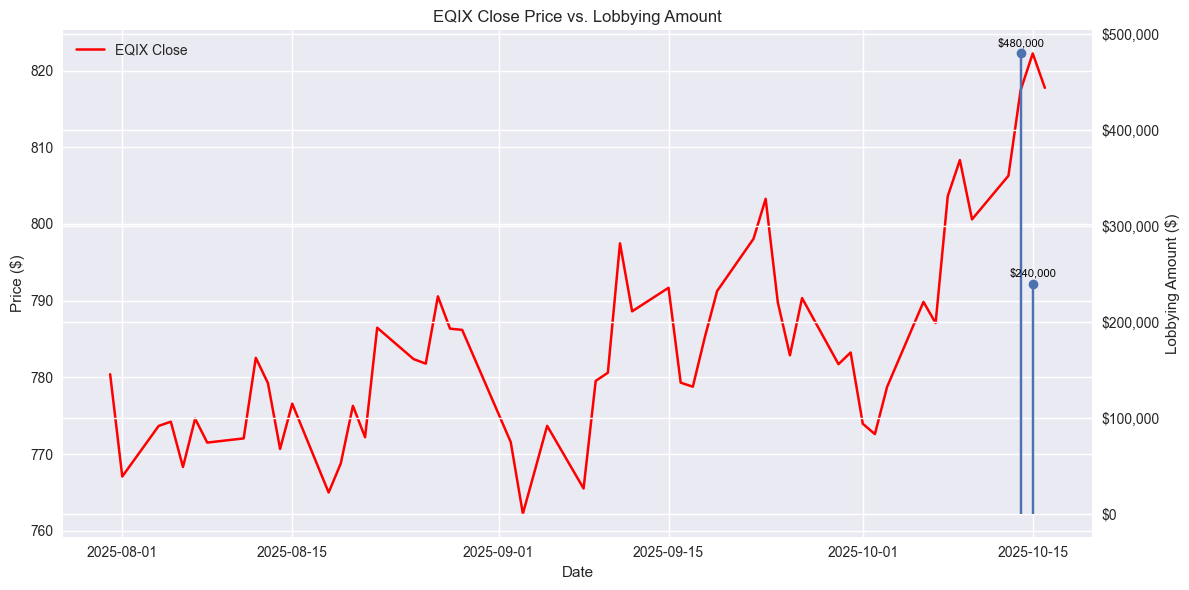

In [95]:
lobbying_viz('EQIX')

In [86]:
df_collapsed.groupby('ticker')['amount'].sum().sort_values(ascending=False).head(20)

ticker
V       15960000
INTC     4850000
LMT      4014915
PFE      3770000
SO       2890000
VRTX     2270000
BDX      2055000
ARDX     1950000
TAK      1620000
FLR       945887
CTVA      900000
HPQ       800000
EQIX      720000
BAH       680000
NDAQ      650000
PRU       614723
GNW       459296
BF.A      450000
ECL       430000
SRPT      430000
Name: amount, dtype: int64

In [94]:
df_collapsed[df_collapsed['ticker'] == 'EQIX']

,ticker,adjusted_date,amount,company_name
409,EQIX,2025-10-14,480000,Equinix Inc.
431,EQIX,2025-10-15,240000,Equinix Inc.
